# Portfolio Choice with Risky Housing
### By Alan Lujan and the Econ-ARK team

[![badge](https://img.shields.io/badge/launch-binder%20notebook-579ACA.svg?logo=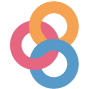)](https://mybinder.org/v2/gh/llorracc/PortfolioChoiceWithRiskyHousing-Latest/HEAD?filepath=Code%2FPython%2Fblog_post.ipynb)    [![badge](https://img.shields.io/badge/launch-binder%20lab-F5A252.svg?logo=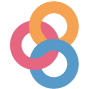)](https://mybinder.org/v2/gh/llorracc/PortfolioChoiceWithRiskyHousing-Latest/HEAD?urlpath=lab%2Ftree%2FCode%2FPython%2Fblog_post.ipynb)

Economists have long sought to use models of optimal portfolio choice to try to understand saving and investment decisions over a household's life-cycle. However, as noted in [our previous blog post]() optimal choices implied by state-of-the-art models differ considerably from portfolio choices people actually make.  Here, we show that some of the results from those models may be misleading because the models neglect the implications of homeownership.

Models like the one we examined before account for different types of uncertainty (labor income risk, mortality risk, and stock market risk), and allow for rational risk aversion, impatience, and many other realistic features. One interpretation of the discrepancy between the models' predictions and people's actual choices is that people are not behaving optimally.  Another possibility, though, is that the models are still missing some vitally important (and rational) factor that weighs on people's actual decisions; in this case, the models would be wrong.

For most households homeownership is the biggest financial decision in their lives and, as such, it has implications for their optimal portfolio choice.   Two leading reasons homeownership _should_ matter are that homeownership exposes consumers to housing market price risk, and is associated with certain payment obligations (not just mortgages, but property taxes, maintenance costs, and so on). 

These points may seem obvious, but there is a good reason they have not been incorporated in previous analyses of households' optimal choice:  Taking account of these complexities greatly increases the computational difficulty of calculating mathematically optimal behavior.  This blog post describes results obtained using the latest tools to be added to the [Econ-ARK]() toolkit; with these tools, it should be much easier for economists, financial planners, and others to understand the appropriate role of homeownership in modifying investors' optimal saving and financial choices.

### Portfolio Choice

Our [previous blog post, Chris Carroll and the Econ-ARK team](https://www.thinkforwardinitiative.com/stories/optimal-financial-investments-over-the-life-cycle) introduced the module [`ConsPortfolioModel`](https://hark.readthedocs.io/en/latest/reference/ConsumptionSaving/ConsPortfolioModel.html). This tool evaluates the optimal choices of a household which can invest in a risky (but higher expected return) asset or a safe (but certain and lower return) asset. The toolkit is flexible enough to model various lifecycle properties such as varying labor income risk, mortality risk, and stock market inattention and misconceptions. Nevertheless, as discussed in the previous blog post, there are stark differences between this model's predictions and how people actually behave.

### The Problem: Housing

Perhaps the biggest financial decision in a household's life is buying a house. Houses come in different sizes (and therefore costs), but they are generally an expensive asset that is worth at least a few times the household's yearly income. Young households usually can not buy their houses outright, as they start with little to no assets and take time to accumulate enough resources. For this reason, they rely on mortgages to purchase their houses and take on substantial amounts of debt. These young and leveraged households might thus be too sensitive to stock market risk given their risk tolerance, and cause them to reduce their stock market participation.

During the repayment period, households' market resources (or liquid assets) are reduced by the fixed mortgage payment. This has 2 effects on risky asset choice: 1) It reduces market resources today, making households relatively less wealthy, and 2) It reduces market resources in following periods for any given level of current savings, making households more risk averse due to the precautionary motive. The fixed nature of mortgage payments has another important effect: since the household must be sure to have sufficient resources in the next period to pay their mortgage and the cost of house maintenance, they might want to save more of their resources in a safe account rather than in the risky stock market.

Houses also generally experience price fluctuations that depend on local housing market conditions as well as broader national trends, such as recessions and expansions. The fluctuating selling value of your house, then, can bring additional uncertainty to future net worth and have significant implications regarding portfolio decisions. Because homeowners have implicit holdings in a risky asset which can not be easily adjusted---the house---they may want to reduce their exposure to additional risk and reduce their savings in another risky asset, the stock market. 

Portfolio choice models, such as `ConsPortfolioModel` above, have not been able to match household behavior in the stock market. According to these models, households should all participate in the stock market and, conditional on participating, the risky share of their portfolio should be much higher. In reality, few households participate in the stock market and those who do have a lower-than-expected exposure to stocks. This gap in observed behavior is known in the economics and finance literature as the stock holding puzzle. For the reasons described above, housing might be a significant contributor to the stock-holding puzzle.


### The standard model

Our model is an extension of the `ConsPortfolioModel` with the added features of homeownership such as mortgage payments, house maintenance costs, and housing market price risk.

#### Young households

The first stage of the model consists of young households making a decision to buy a house of fixed size. Importantly, young households have little to no assets and have recently joined the labor market, which means their income is also relatively small. In order to finance a home, then, young households must choose a house of a particular value and a corresponding mortgage size. The lenders, on the other hand, impose some microprudential conditions such as loan-to-income ratios to ensure that mortgages are repayable.

#### Mortgage payments

Once households choose a house and mortgage, they commit to fixed-rate payments for the rest of their working life, which is about 30 years. During this time, households have an implicit holding of a risky asset in their homes (because of their uncertain resell values), which may lead them to reduce their exposure to other risky assets, such as the stock market.

#### Retired homeowners

Once they reach retirement, households have paid of their mortgage and have accumulated savings, making them significantly wealthier than young households (house value + savings). During this period, households experience risk of house liquidation due to the possibility of being forced to move out due to poor health or old age. If they are forced to sell, they do so at their local housing market prices and this increases their liquid wealth.

#### Retired renters

Retired renters have none of the complexities that come with owning a home, and thus behave like standard `ConsPortfolioModel` households. Instead of choosing only consumption, however, these households choose a level of total expenditures to spend on both consumption and rental housing. After becoming renters, households remain renters for the rest of their lives.

#### (Dots below represent computer code that produces all our results; click to expose)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from ConsPortfolioHousingModel import (
    PortfolioRiskyHousingType,
    portfolio_housing_params,
)

In [2]:
portfolio_risky_housing = portfolio_housing_params(
    CRRA=10,
    DiscFac=0.96,
    T_cycle=8,
    T_retire=1,
    PermShkStd=0.1029563,
    PermShkCount=3,
    Rfree=1.02,
    RiskyAvg=1.08,
    RiskyStd=0.157,
    RiskyCount=3,
    HouseAvg=1.0,
    HouseStd=0.2,
    HouseShkCount=7,
    HseGroFac=1.01,
    HseDiscFac=0.01,
    HseInitPrice=1.0,
)

agent = PortfolioRiskyHousingType(**portfolio_risky_housing)

In [3]:
agent.solve()

In [4]:
solution = agent.solution

### Results

#### Homeownership increases intensive margin of stock market participation

The proportion of liquid assets invested in the stock market is known as the risky portfolio share, or risky share for short. According to the model, retired households who own their homes and expect to sell them by next period have a higher  **risky share** than retired households who rent, and their risky share increases with house size, holding liquid wealth constant.

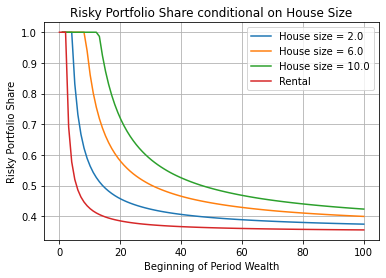

In [5]:
M = np.linspace(0.0, 100, 100)
for h in np.linspace(2.0, 10.0, 3):
    C = solution[-2].ShareFuncHse(M, h * np.ones_like(M))
    A = M - C - 0.02 * h
    plt.plot(M, C, label="House size = {}".format(h))
plt.plot(M, solution[-2].ShareFuncRnt(M), label="Rental")
plt.legend()
plt.grid()
plt.ylabel("Risky Portfolio Share")
plt.xlabel("Beginning of Period Wealth")
plt.title("Risky Portfolio Share conditional on House Size")
plt.show()

Clearly, the bigger the house size, the wealthier the agents are in terms of net worth. In the standard portfolio choice model, wealthier households actually reduce their risky share to reduce risk in next period's consumption. In the presence of housing, however, households still reduce their risk exposure as liquid wealth increases, but at a lower rate.

A better comparison is to add the expected value of the house to liquid wealth. In this way, we compare an agent with $w$ net worth with all liquid wealth and no home, with an agent with $w$ net worth, some of which is liquid wealth $m$, and the rest is the expected house valuation $E[Q]h$,  such that $w = m + E[Q]h$, where $Q$ dentotes house prices and $h$ represents the size of the agent's house.

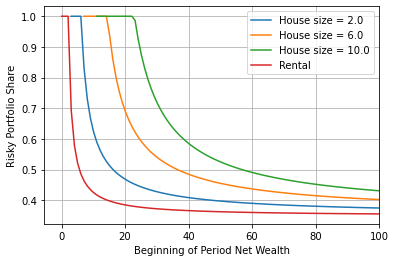

In [6]:
M = np.linspace(0.0, 100, 100)
for h in np.linspace(2.0, 10.0, 3):
    C = solution[-2].ShareFuncHse(M, h * np.ones_like(M))
    plt.plot(M + h, C, label="House size = {}".format(h))
plt.plot(M, solution[-2].ShareFuncRnt(M), label="Rental")
plt.legend()
plt.grid()
plt.gca().set_xlim(right=100)
plt.ylabel("Risky Portfolio Share")
plt.xlabel("Beginning of Period Net Wealth")
plt.show()

Additionally, an interesting observation is that according to the model retired households who are about to sell their homes are willing to risk at least the full expected value of their homes ($E[Q]h$) for certain when they have low liquidity. In other words, their risky share is equal to 1 at least up to the point where their liquid wealth is equal to their expected house valuation. If we shift their liquid wealth leftward by the amount of their expected house valuation, we see that their risky share starts dropping at about the same point as it would if they rented a house instead. We can conclude that having a house shifts the risky share curve rightward by an amount equal to the expected value of the house, but this is not the only effect. A larger house also reduces the rate at which the risky share decreases.

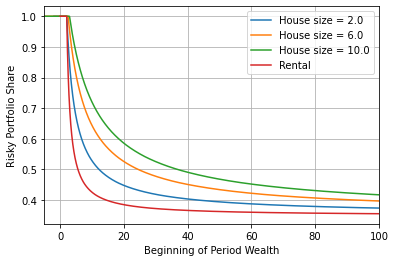

In [7]:
M = np.geomspace(1, 111, 1000) - 1
for h in np.linspace(2.0, 10.0, 3):
    C = solution[-2].ShareFuncHse(M, h * np.ones_like(M))
    plt.plot(M - h, C, label="House size = {}".format(h))
plt.plot(M, solution[-2].ShareFuncRnt(M), label="Rental")
plt.legend()
plt.xlim([-5, 100])
plt.ylabel("Risky Portfolio Share")
plt.xlabel("Beginning of Period Wealth")
plt.grid()
plt.show()

### Increasing House price risk decreases risky share

The volatility of the housing market can have strong implications for the portfolio decisions of households who own their houses. A higher standard deviation in house prices implies a larger implicit holding of a risky asset (the house), regardless of house size. For this reason, households would optimally choose to avoid risk in other risky assets. As we see in the figure below for 2 households who have a house of equal size, the risky share of a household in a more volatile market is lower than that of a household in a less volatile market, except at low levels of market resources. Households that experience high price volatility in the housing market reduce their exposure to risk elsewhere, leading to lower risky portfolio shares.

In [8]:
portfolio_risky_housing["HouseStd"] = 0.5
agent2 = PortfolioRiskyHousingType(**portfolio_risky_housing)
agent2.solve()
solution2 = agent2.solution

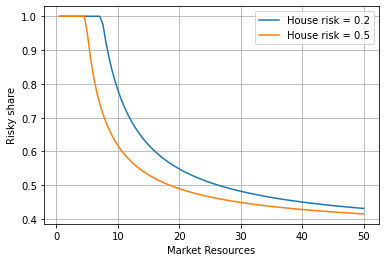

In [9]:
M = np.linspace(0, 50, 100)
h = 5.0
C = solution[-2].ShareFuncHse(M, h * np.ones_like(M))
C2 = solution2[-2].ShareFuncHse(M, h * np.ones_like(M))
plt.plot(M, C, label="House risk = {}".format(0.2))
plt.plot(M, C2, label="House risk = {}".format(0.5))
plt.legend()
plt.grid()
plt.ylabel("Risky share")
plt.xlabel("Market Resources")
plt.savefig("fig1.pdf")
plt.savefig("fig1.png")
plt.show()

### Larger houses increase households absolute risk taking

As mentioned before, a house represents an implicit holding in a risky market that is otherwise uncorrelated with the stock market. A larger house, however, provides a higher expected value of house liquidation which also means a higher expected future liquid wealth. Households with more valuable homes, then, have a higher absolute risk tolerance and thus invest more resources in the risky asset market than they would if they had smaller homes.

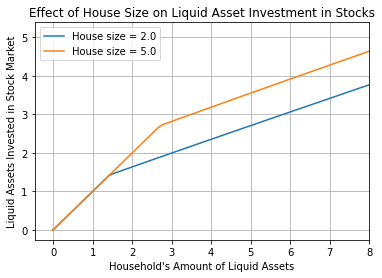

In [10]:
M = np.linspace(0.0, 20, 100)
for h in [2.0, 5.0]:
    S = solution[-2].ShareFuncHse(M, h * np.ones_like(M))
    C = solution[-2].cFuncHse(M, h * np.ones_like(M))
    A = M - C - 0.02 * h
    plt.plot(A, S * A, label="House size = {}".format(h))
plt.legend()
plt.grid()
plt.ylabel("Liquid Assets Invested in Stock Market")
plt.xlabel("Household's Amount of Liquid Assets")
plt.title("Effect of House Size on Liquid Asset Investment in Stocks")
plt.gca().set_xlim(right=8)
plt.savefig("fig2.pdf")
plt.savefig("fig2.png")
plt.show()

### House Size crowds out investment

However, when comparing households on a total wealth basis, i.e. their liquid assets plus expected house liquidation, we can see that house size crowds out investment for households with low liquid wealth. In the graph below, we can consider a household whose house size is equal to 5 (5 times their yearly net income) and liquid assets are \\$0, so their total expected wealth is \\$5. As this household becomes wealthier, they invest all of their liquid assets in the stock market (such that their risky share is 100\\%), up to the point where they start rebalancing their portfolio between the risky and the safe asset. In this region, they are constrained from investing in the stock market by their low liquid wealth, as they surely would like to invest more in the market. This point becomes clearer by comparing the household to an equally wealthy peer with a smaller house.  At the point where the household with house size of 5 has liquid wealth of \\$1 (1 times their yearly net income), they are investing less into the stock market in absolute terms than an equally wealthy household whose house size is equal to 2 and liquid assets are equal to \\$4. The total expected wealth of both these households is \\$6, but the household with the larger house is investing fewer assets in the stock market than the household with the smaller house. As their total wealth increases, however, both households are unconstrained by their house size and end up investing about the same amount into the stock market in absolute terms.

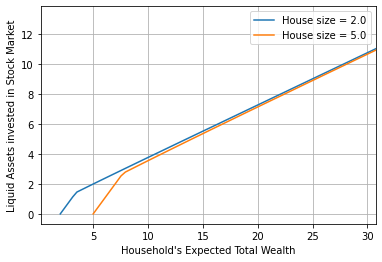

In [11]:
h_sizes = [2.0, 5.0]
M = np.linspace(0.0, 70, 100)
maxX = 100
for i in range(len(h_sizes)):
    h = h_sizes[i]
    S = solution[-2].ShareFuncHse(M, h * np.ones_like(M))
    C = solution[-2].cFuncHse(M, h * np.ones_like(M))
    A = M - C - 0.02 * h
    g1 = S * A
    g2 = (1 - S) * A
    g3 = h / (A + h)

    X = A + h
    maxX = np.minimum(maxX, np.nanmax(X))
    plt.plot(X, g1, label="House size = {}".format(h))
plt.legend()
plt.gca().set_xlim(right=maxX)
plt.grid()
plt.ylabel("Liquid Assets invested in Stock Market")
plt.xlabel("Household's Expected Total Wealth")
plt.savefig("fig3.pdf")
plt.show()

### Optimal Portfolio Choice over the Lifecycle

A result that is consistent with `ConsPortfolioModel` is that younger households have a higher risky share of assets than older households, when comparing households of equal house size and no mortgage debt. Similarly, older households consume more than younger households, as their consumption horizon gets shorter and the likelihood that they receive a windfall of wealth from their house liquidation increases.


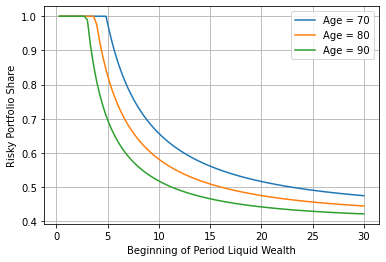

In [12]:
M = np.linspace(0, 30, 100)
h = 1.0
ages = [2, 4, 6]
for age in ages:
    C = solution[age].ShareFuncHse(M, h * np.ones_like(M))
    c2 = solution[age].ShareFuncRnt(M)
    A = M - C - 0.02 * h
    plt.plot(M, C, label="Age = {}".format(age * 5 + 60))
plt.legend()
plt.grid()
plt.ylabel("Risky Portfolio Share")
plt.xlabel("Beginning of Period Liquid Wealth")
plt.show()

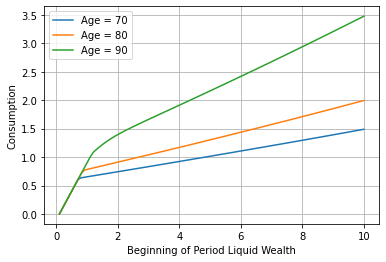

In [13]:
M = np.linspace(0.0, 10, 100)
h = 5.0
ages = [2, 4, 6]
for age in ages:
    C = solution[age].cFuncHse(M, h * np.ones_like(M))
    A = M - C - 0.02 * h
    plt.plot(M, C, label="Age = {}".format(age * 5 + 60))
plt.legend()
plt.grid()
plt.ylabel("Consumption")
plt.xlabel("Beginning of Period Liquid Wealth")
plt.show()